In [11]:
!python -m pip install multiple-hypothesis-testing

In [12]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive/')
    # import glob; print(glob.glob('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis/*'))
    import sys
    sys.path.append('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis')
except:
    pass

In [13]:
from Synthetic_Data_Generators import Multi_Class_Normal_Population as Data_Generator
from Synthetic_Data_Generators import signal_2_noise_roc, Two_Lists_Tuple
from Higher_Criticism import Higher_Criticism
higher_criticism = Higher_Criticism(use_import=False)

In [14]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'monospace'


Working on sample size: 1000


100%|██████████| 9/9 [00:55<00:00,  6.22s/it]


Working on sample size: 2000


100%|██████████| 9/9 [01:37<00:00, 10.88s/it]


Working on sample size: 3000


100%|██████████| 9/9 [02:16<00:00, 15.17s/it]


Working on sample size: 5000


100%|██████████| 9/9 [03:32<00:00, 23.65s/it]


Working on sample size: 6000


100%|██████████| 9/9 [04:17<00:00, 28.65s/it]


Working on sample size: 7000


100%|██████████| 9/9 [04:55<00:00, 32.83s/it]


Working on sample size: 8000


100%|██████████| 9/9 [05:38<00:00, 37.59s/it]


Working on sample size: 10000


100%|██████████| 9/9 [07:42<00:00, 51.39s/it]


Working on sample size: 20000


100%|██████████| 9/9 [13:47<00:00, 91.92s/it]


Working on sample size: 30000


100%|██████████| 9/9 [20:31<00:00, 136.85s/it]


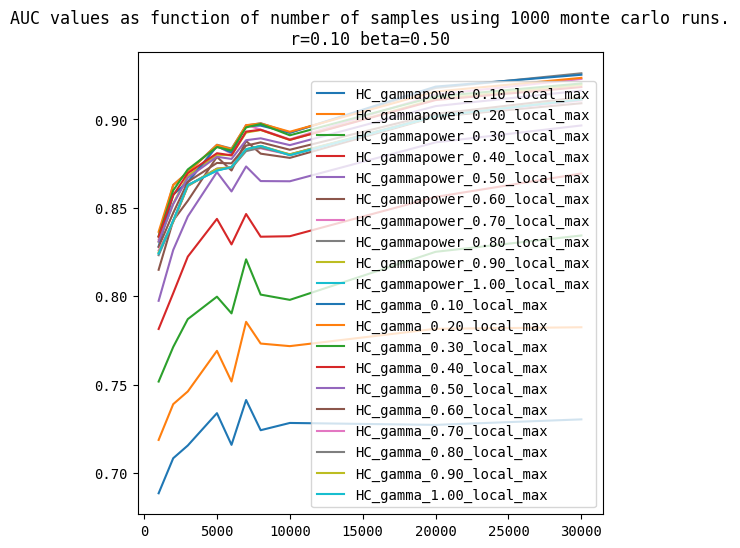

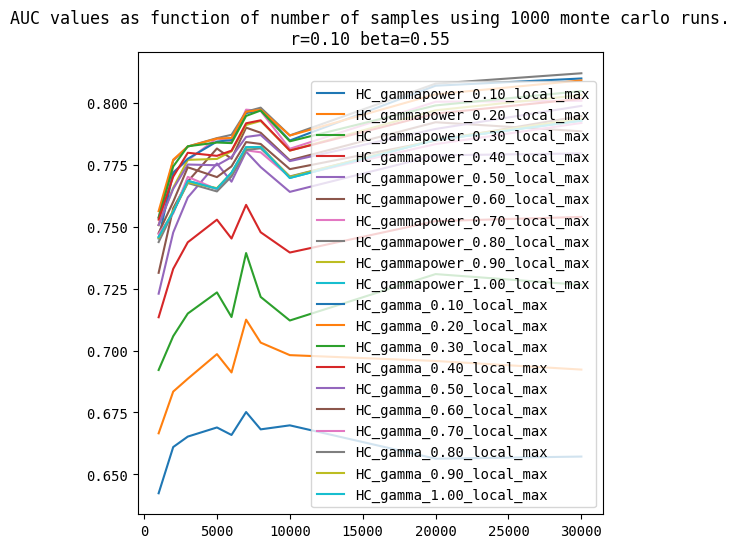

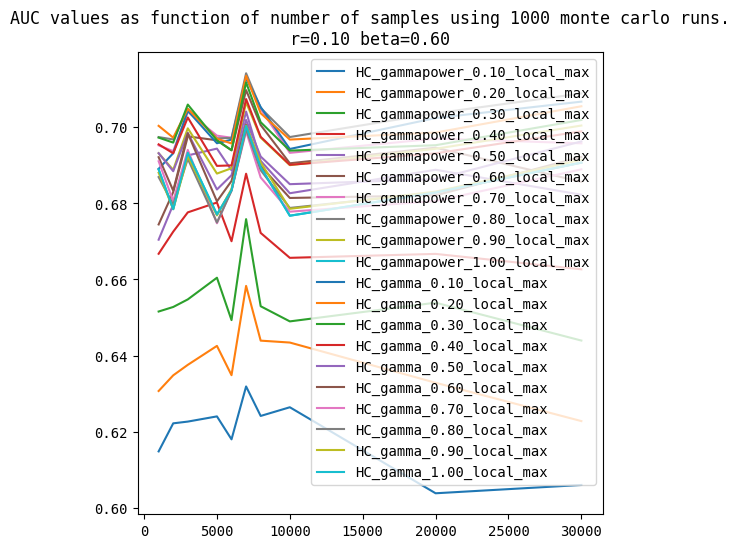

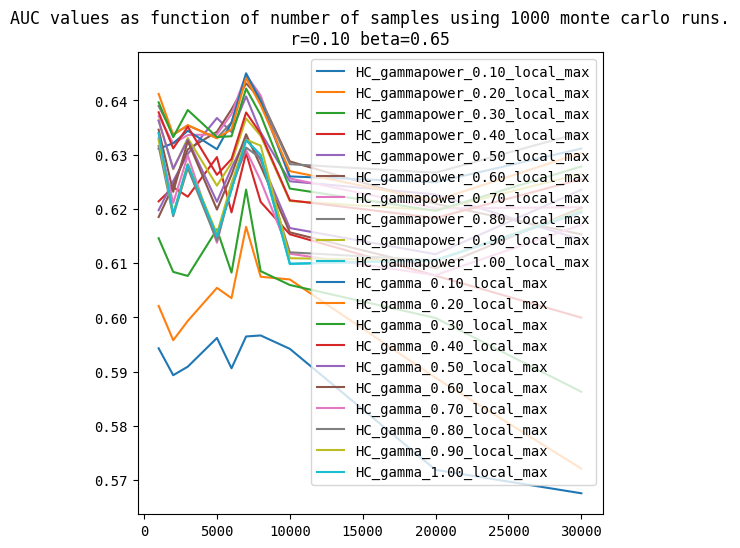

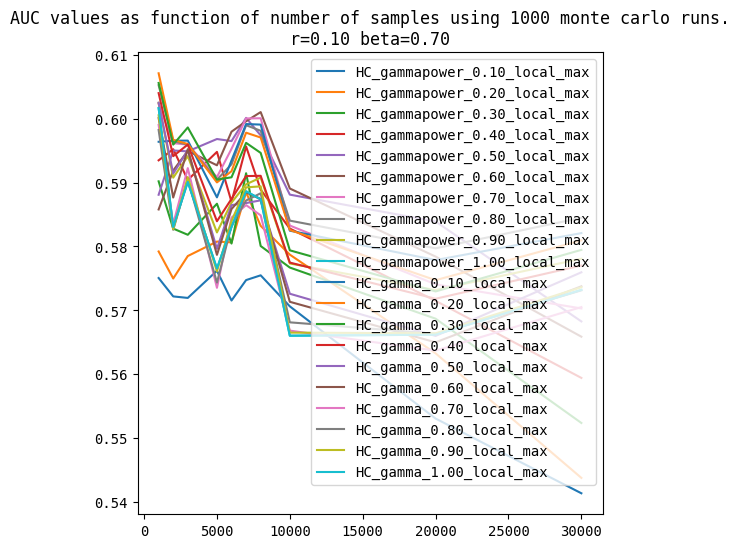

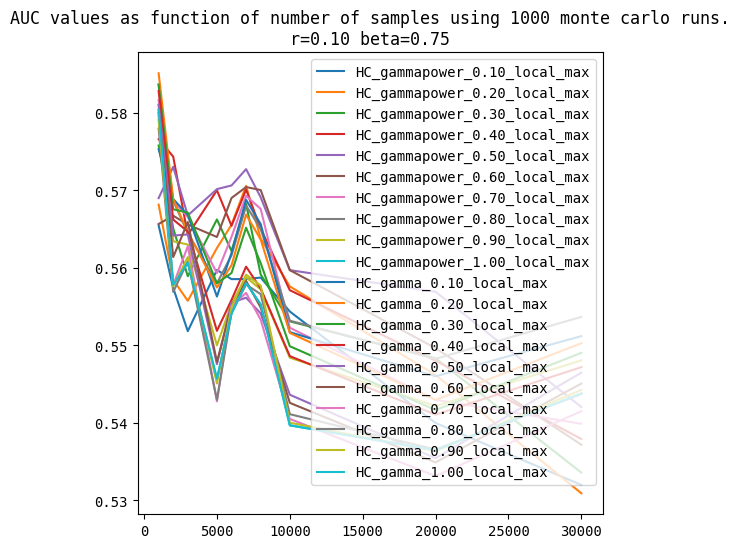

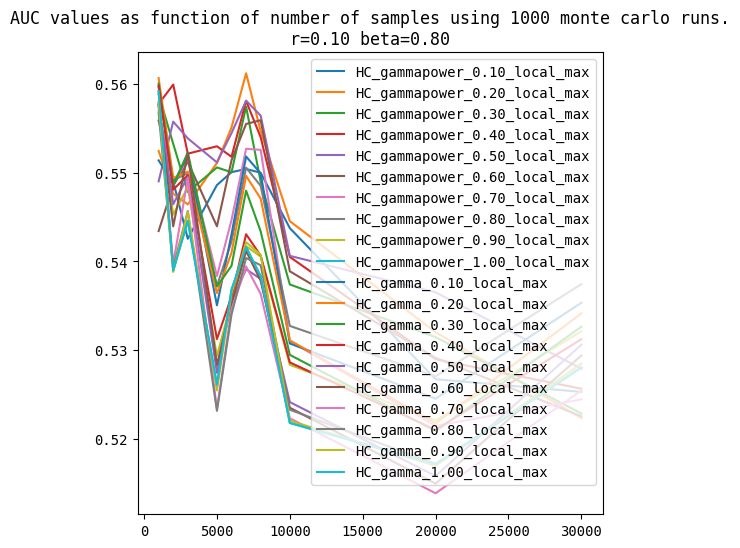

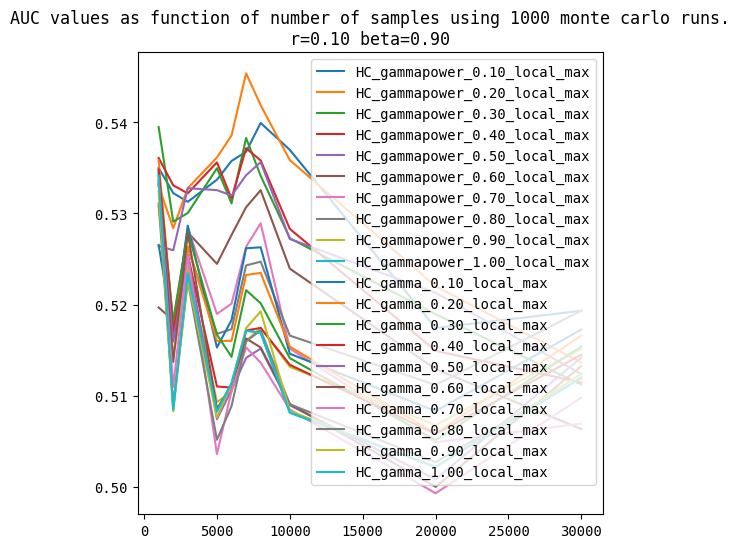

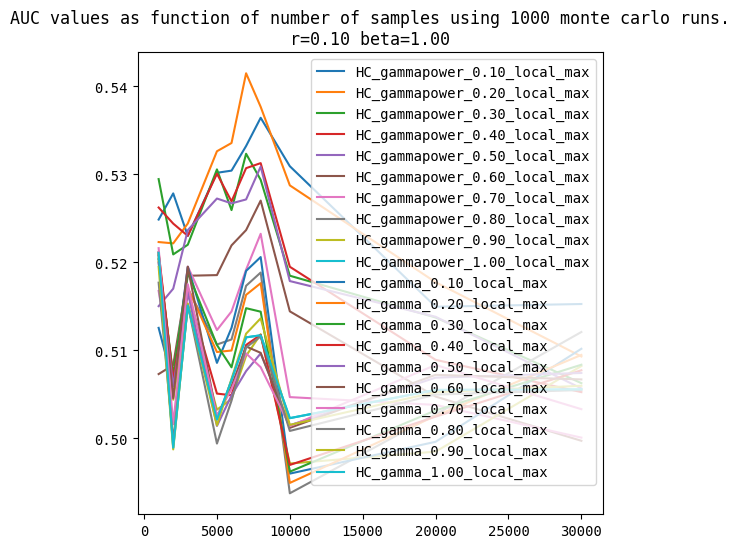

In [15]:
monte_carlo=1000
N_range = [1000, 2000, 3000, 5000, 6000, 7000, 8000, 10000, 20000, 30000]
r_range = [0.1]  # , 0.3, 0.7, 1.0, 1.3, 1.7, 2.0]
beta_range = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.9, 1.0]
collect_results = {}
hc_models = [Higher_Criticism(global_max=False, gamma_power=gamma) for gamma in np.linspace(0.1,1.0,10)]
hc_models += [Higher_Criticism(global_max=False, gamma=gamma) for gamma in np.linspace(0.1,1.0,10)]

params_list = Two_Lists_Tuple(list(enumerate(beta_range)), list(enumerate(r_range)))
for ind_N, N in enumerate(N_range):
    print(f'Working on sample size: {N}')
    for (ind_beta, beta), (ind_r, r) in tqdm(params_list):
        signal_generator = Data_Generator(**Data_Generator.params_from_N_r_beta(N=N, r=r, beta=beta))
        hc_monte_carlo = Higher_Criticism.monte_carlo_statistics_HC(hc_models=hc_models, monte_carlo=monte_carlo, data_generator=signal_generator)
        for key, auc in hc_monte_carlo.items():
            if key not in collect_results:
                collect_results[key] = np.empty(shape=(len(N_range),len(r_range),len(beta_range)), dtype=np.float32)
            collect_results[key][ind_N, ind_r, ind_beta] = auc

for (ind_beta, beta), (ind_r, r) in params_list:
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    for key in collect_results:
        auc = collect_results[key][:, ind_r, ind_beta].reshape(-1)
        ax.plot(N_range, auc, label=key)
        #ax.set_ylim(bottom=0.0, top=1.0)
    ax.set_title(f'AUC values as function of number of samples using {monte_carlo} monte carlo runs.\n' + f'r={r:.2f} beta={beta:.2f}')
    plt.legend()
    plt.show()
